In [177]:
#NAME: Atharva S Gadad SEC: B SRN: PES1UG20CS088
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#from statsmodels.stats import weightstats as stests

In [178]:
#Importing the csv file and creating a datafram
df=pd.read_csv("6.csv")

In [179]:
#Printing the first few values to get an idea about the data frame
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,67,Mariya Vasilyevna Abakumova (-Tarabina),F,23.0,176.0,74.0,Qatar,QAT,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
1,411,Gezahgne Abera,M,23.0,163.0,52.0,Turkey,TUR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Bronze
2,428,Elvan Abeylegesse,F,26.0,156.0,40.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver
3,846,Valerie Kasanita Adams-Vili (-Price),F,24.0,190.0,114.0,Sudan,SUD,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Bronze
4,846,Valerie Kasanita Adams-Vili (-Price),F,28.0,190.0,114.0,Sudan,SUD,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Shot Put,Bronze


In [180]:
#Describing the data
df.describe()

,ID,Age,Height,Weight,Year
count,1113.000000,1108.000000,1111.000000,1106.000000,1113.000000
mean,66293.287511,27.121841,174.351935,66.397830,2006.080863
std,38961.671305,4.158616,10.660840,20.047386,6.833893
min,67.000000,17.000000,150.000000,40.000000,1996.000000
25%,32382.000000,24.000000,167.000000,53.000000,2000.000000
50%,64347.000000,27.000000,173.000000,61.000000,2008.000000
75%,100516.000000,30.000000,182.000000,74.000000,2012.000000
max,135563.000000,40.000000,206.000000,153.000000,2016.000000


In [181]:
#1)
#Finding the percentage of null values in different columns
df.isna().mean().round(4) * 100

ID        0.00
Name      0.00
Sex       0.00
Age       0.45
Height    0.18
Weight    0.63
Team      0.00
NOC       0.00
Games     0.00
Year      0.00
Season    0.00
City      0.00
Sport     0.00
Event     0.00
Medal     0.00
dtype: float64

In [182]:
#HANDLING THE NULL VALUES
# We are seeing that there are null values only for numerical categories like Age, Weight and Height. We have been aseked to 
# replace the Null values with numeric mean

#Doing for Age
df["Age"]=df["Age"].fillna(value=df["Age"].mean())

#Doing for Height
df["Height"]=df["Height"].fillna(value=df["Height"].mean())

#Doing for Weight
df["Weight"]=df["Weight"].fillna(value=df["Weight"].mean())

#Printing the mean values for Age, Height, Weight
print(df["Age"].mean(),df["Height"].mean(),df["Weight"].mean())

27.121841155234655 174.35193519351935 66.39783001808318


In [183]:
# Now checking the percentage of Null values in each column (ideally all should be zero)
df.isna().mean().round(4) * 100

ID        0.0
Name      0.0
Sex       0.0
Age       0.0
Height    0.0
Weight    0.0
Team      0.0
NOC       0.0
Games     0.0
Year      0.0
Season    0.0
City      0.0
Sport     0.0
Event     0.0
Medal     0.0
dtype: float64

<AxesSubplot:>

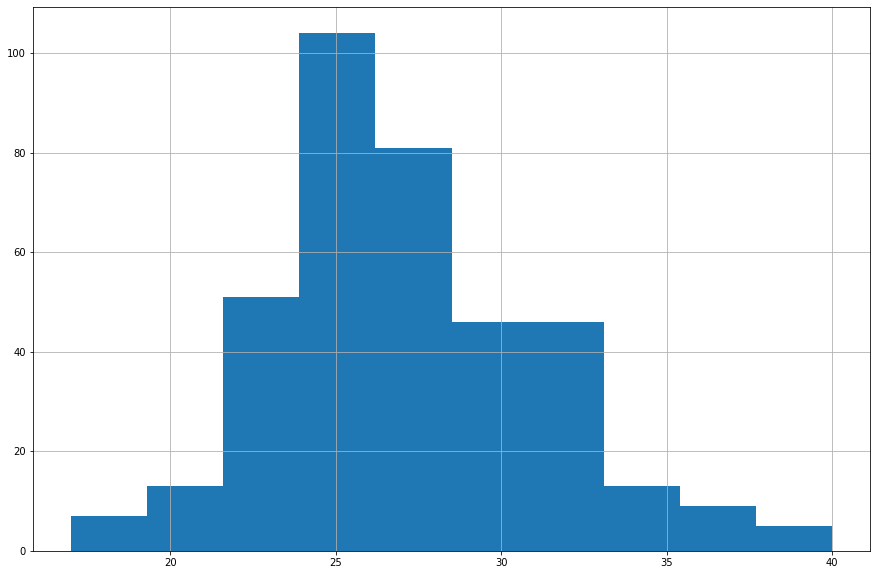

In [184]:
#2)
#Visualizing the distribution of age for olympic silver medalists using Histogram chart
y=[i for i in range(len(df["Medal"])) if df["Medal"][i]=="Silver"]
y=df.loc[y]
y["Age"].hist(bins=10, figsize=(15,10))


In [185]:
#3)
#Trying to calculate BMI of athletes
#We first need to convert the height from centimeters to meters
df["Height"]=df["Height"]/100

#Now we create a cloumn named "BMI" and it will have the BMI for each athlete
df["BMI"]=df["Weight"]/(df["Height"]*df["Height"])
df.head(7)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,67,Mariya Vasilyevna Abakumova (-Tarabina),F,23.0,1.76,74.0,Qatar,QAT,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,23.889463
1,411,Gezahgne Abera,M,23.0,1.63,52.0,Turkey,TUR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Bronze,19.571681
2,428,Elvan Abeylegesse,F,26.0,1.56,40.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver,16.436555
3,846,Valerie Kasanita Adams-Vili (-Price),F,24.0,1.90,114.0,Sudan,SUD,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Bronze,31.578947
4,846,Valerie Kasanita Adams-Vili (-Price),F,28.0,1.90,114.0,Sudan,SUD,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Shot Put,Bronze,31.578947
5,846,Valerie Kasanita Adams-Vili (-Price),F,32.0,1.90,114.0,Sudan,SUD,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver,31.578947
6,963,Derrick Ralph Adkins,M,27.0,1.85,74.0,Mexico,MEX,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Bronze,21.621622


0.5622914322254242

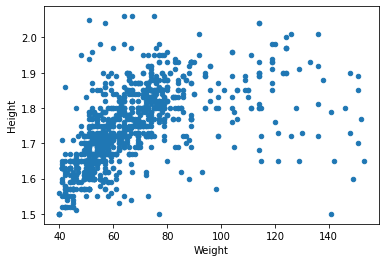

In [186]:
#Generating a scatter plot for Height v/s Weight
df.plot.scatter(x = 'Weight', y = 'Height')
#Looking at the scatter plot, while it seems to be very scattered and hard to predict, it seems to be a positive correlation but this 
#is not very strong
correlation = df["Height"].corr(df["Weight"])
correlation
#This means only 56.51% of our variables have a positive correlation

In [187]:
#Finding the list of unique sports
sports = df["Sport"].unique()
print(sports)

#We see that our data set has only athletics

#Finding the max year in the data
print(df["Year"].max())

# So Past 5 years means 2012 to 2016, we create a dataframe for that
data=[i for i in range(len(df["Year"])) if df["Year"][i]>=2012]
data=df.loc[data]

#Now finding the years for which data is present
print(data["Year"].unique())

#So data is present for 2012 and 2016

['Athletics']
2016
[2012 2016]


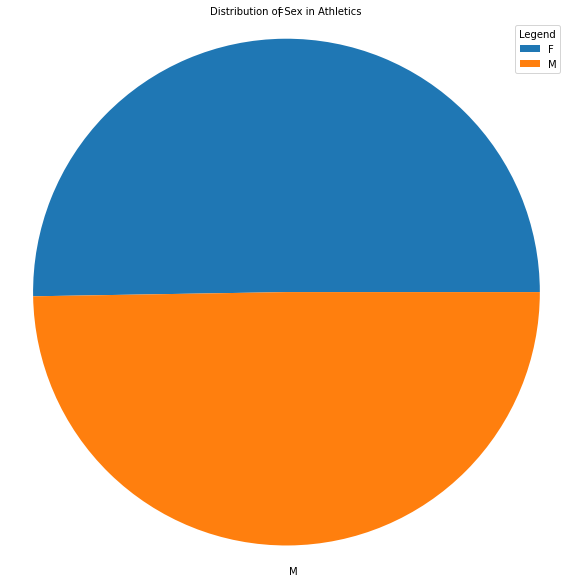

In [188]:
# So we found that Athletics is the only sport in the data
# We will find distribution of gender in this sport over the last 5 years
# Even if we considered events, each event was either for females or males and not MIXED

#Plotting a pie graph describing the distribution of genders over past 5 years 
target= data["Sex"].value_counts()
fig1, ax1= plt.subplots(1,1,figsize=(10,10)) 
ax1.pie(target, labels=target.index, shadow=None)
ax1.axis('equal')
plt.title("Distribution of Sex in Athletics", fontsize=10)
plt.legend(title="Legend")
plt.show()

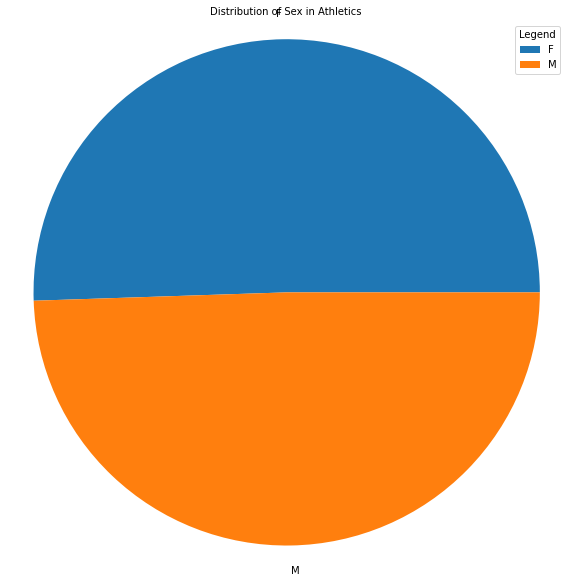

In [189]:
# Describing the same for 2012
d1=[i for i in range(len(df["Year"])) if df["Year"][i]==2012]
d1=df.loc[d1]
target= d1["Sex"].value_counts()
fig1, ax1= plt.subplots(1,1,figsize=(10,10)) 
ax1.pie(target, labels=target.index, shadow=None)
ax1.axis('equal')
plt.title("Distribution of Sex in Athletics", fontsize=10)
plt.legend(title="Legend")
plt.show()

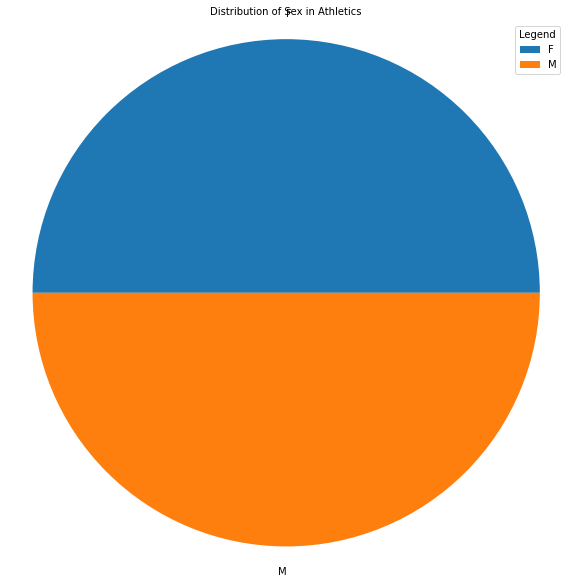

In [190]:
# For 2016
d2=[i for i in range(len(df["Year"])) if df["Year"][i]==2016]
d2=df.loc[d2]
target= d2["Sex"].value_counts()
fig1, ax1= plt.subplots(1,1,figsize=(10,10)) 
ax1.pie(target, labels=target.index, shadow=None)
ax1.axis('equal')
plt.title("Distribution of Sex in Athletics", fontsize=10)
plt.legend(title="Legend")
plt.show()

In [191]:
#So there is approximately equal representation of males and females in Athletics in the past 5 Years

In [192]:
#TASK 1: Again, our dataset has only Athletics sport
# Trying to find the team with maximum participation
print(df["Team"].value_counts())


Mexico         225
Mozambique     118
Qatar          103
Brazil          59
Serbia          52
              ... 
Croatia          1
Syria            1
Netherlands      1
Ukraine          1
Romania          1
Name: Team, Length: 78, dtype: int64


2000    190
2012    190
2016    188
2008    185
1996    180
2004    180
Name: Year, dtype: int64


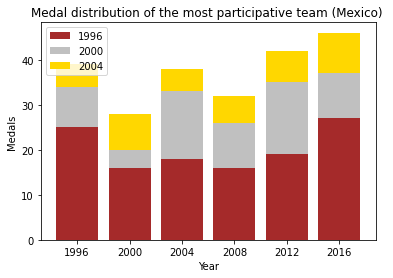

In [193]:
# We see that Mexico has had the maximum participation
# Now we count the number of medals won by Mexico in eaxh year and will plot a stacked bar graph 
print(df["Year"].value_counts())
#We see the years present are 1996,2000,2004,2008,2012,2016
# So We create a stacked bar graph now
golds_year_1996=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==1996)  if (df["Medal"][i]=="Gold")]
golds_year_2000=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2000)  if (df["Medal"][i]=="Gold")]
golds_year_2004=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2004)  if (df["Medal"][i]=="Gold")]
golds_year_2008=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2008)  if (df["Medal"][i]=="Gold")]
golds_year_2012=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2012)  if (df["Medal"][i]=="Gold")]
golds_year_2016=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2016)  if (df["Medal"][i]=="Gold")]

silver_year_1996=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==1996)  if (df["Medal"][i]=="Silver")]
silver_year_2000=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2000)  if (df["Medal"][i]=="Silver")]
silver_year_2004=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2004)  if (df["Medal"][i]=="Silver")]
silver_year_2008=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2008)  if (df["Medal"][i]=="Silver")]
silver_year_2012=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2012)  if (df["Medal"][i]=="Silver")]
silver_year_2016=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2016)  if (df["Medal"][i]=="Silver")]

bronze_year_1996=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==1996)  if (df["Medal"][i]=="Bronze")]
bronze_year_2000=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2000)  if (df["Medal"][i]=="Bronze")]
bronze_year_2004=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2004)  if (df["Medal"][i]=="Bronze")]
bronze_year_2008=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2008)  if (df["Medal"][i]=="Bronze")]
bronze_year_2012=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2012)  if (df["Medal"][i]=="Bronze")]
bronze_year_2016=[i for i in range(len(df["Year"])) if (df["Team"][i]=="Mexico") if (df["Year"][i]==2016)  if (df["Medal"][i]=="Bronze")]
x=["1996","2000","2004","2008","2012","2016"]
bronze=[len(bronze_year_1996),len(bronze_year_2000),len(bronze_year_2004),len(bronze_year_2008),len(bronze_year_2012),len(bronze_year_2016)]
silver=[len(silver_year_1996),len(silver_year_2000),len(silver_year_2004),len(silver_year_2008),len(silver_year_2012),len(silver_year_2016)]
gold=[len(golds_year_1996),len(golds_year_2000),len(golds_year_2004),len(golds_year_2008),len(golds_year_2012),len(golds_year_2016)]
bronze=np.array(bronze)
silver=np.array(silver)
gold=np.array(gold)
plt.bar(x, bronze, color='brown')
plt.bar(x, silver, bottom=bronze, color='silver')
plt.bar(x, gold, bottom=bronze+silver, color='gold')
plt.xlabel("Year")
plt.ylabel("Medals")
plt.legend(["1996", "2000", "2004", "2008", "2012", "2016"])
plt.title("Medal distribution of the most participative team (Mexico) ")
plt.show()

In [194]:
#TASK 2:

names=list(df["Name"].unique())


values = [0 for i in range(len(names))]
j=0
for i in range(len(df["Name"])):
    if(df["Name"][i]==names[j]):
        values[j]+=1
    else:
        j+=1
        values[j]+=1

        
years= []

for i in range(len(names)):
    a=[]
    for x in range(len(df["Name"])):
        if names[i]==df["Name"][x]:
            a.append(df["Year"][x])
    years.append(len(set(a)))

my_dict={"Names":names,"Medals":values,"Years of Participation":years}

newdf=pd.DataFrame(my_dict)
newdf["Success"]=newdf["Medals"]/newdf["Years of Participation"]
newdf.head(10)

,Names,Medals,Years of Participation,Success
0,Mariya Vasilyevna Abakumova (-Tarabina),1,1,1.0
1,Gezahgne Abera,1,1,1.0
2,Elvan Abeylegesse,1,1,1.0
3,Valerie Kasanita Adams-Vili (-Price),3,3,1.0
4,Derrick Ralph Adkins,1,1,1.0
5,"Olabisi ""Bisi"" Afolabi",1,1,1.0
6,Mobolade Abimbola Ajomale,1,1,1.0
7,Chioma Ajunwa (-Opara),1,1,1.0
8,Morolake Akinosun,1,1,1.0
9,Hadi Soua'an Al-Somaily Jaadan,1,1,1.0


In [198]:
#The most succesful player
p=""
m=0
for i in range(len(newdf)):
    if newdf["Success"][i]>m:
        m=newdf["Success"][i]
        p=newdf["Names"][i]
print(p, "with success ratio", m)

Frentorish "Tori" Bowie with success ratio 3.0
